In [ ]:
import tensorflow as tf
from keras.datasets import mnist
from matplotlib import pyplot as plt
from keras.utils import to_categorical
import numpy as np
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [ ]:
#rozdzielanie datasetu na traning i test 
#x - actual image, y - label
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [ ]:
#jak widzimy w datasecie treningowym znajduje się 60000 zdjec o rozmiarze 28X28, a w testowym 10 000 o takim samym rozmiarze
#nasze dane to trzy wymiarowy wektor (60 000 x 28 x 28)
print('trening:',train_X.shape)
print('test:',test_X.shape)

trening: (60000, 28, 28)
test: (10000, 28, 28)


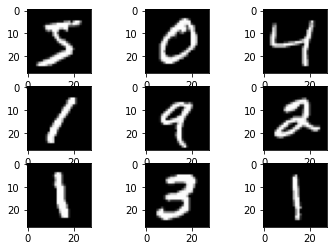

In [ ]:
for i in range(9): 
  #subplot arg = trzycyfrowy_int(nrows/ncols/index{1-9}) 
  
  plt.subplot(330 + 1 + i)

  #plt.subplot(3, 3, 1 + i)
  #zapis jednoznaczny z powyzszym

  plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
#ustawiamy zmienne jako float, początkowo są jako int w przedziale [0,255]

#type w tym przypadku nie zadziala bo to nie jest zwykla zmienna
print(type(train_y))
#np.dtype typ zmiennej w numpy
print(train_X.dtype)

train_X = train_X.astype('float32')
print(train_X.dtype)
test_X = test_X.astype('float32')

<class 'numpy.ndarray'>
uint8
float32


In [ ]:
#dokonujemy normalizacji. Początkowo wartości poszczegulnych pixeli są w przedziale [0, 255], są to duże wartości typu int,
# normalizując je (dzieląc przez 255) zmniejszamy zakres do [0, 1], dzięki czemu model operuje na danych o mniejszej rozpiętości, przez co szybciej się uczy 
train_X /= 255.0
test_X /= 255.0

In [ ]:
# początkowo nasze labele(etykiety) są cyframi od 0 - 9 ---> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for i in range(10):
  print(train_y[i])

5
0
4
1
9
2
1
3
1
4


In [ ]:
#takie kodowanie nie pasuje nam to outputu modelu, ponieważ model dokonuje wyboru na podstawie prawdopodobieństwa każdej klasy
train_y = to_categorical(train_y, num_classes = 10)
test_y = to_categorical(test_y, num_classes =10)
#po zmienieniu formatu labeli wygląda to tak:

In [ ]:
for i in range(10):
  print(train_y[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
#reshape, dzięki "-1" mamy dane w jednym wymiarze
print(train_X.shape)
train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)
print(train_X.shape)
#w skrócie: 60 000 zdjęć, jak wcześniej, tylko tym razem mamy jeden wektor o długości 784 wartości

(60000, 28, 28, 1)
(60000, 784)


In [ ]:
#powyzsza zamiana wylacznie w celach powtorzenia
train_X = train_X.reshape(-1 ,28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
print(train_X.shape)

(60000, 28, 28, 1)


In [ ]:
from sklearn.model_selection import train_test_split
#test_size float(% testowych danych 0-1), int(dokladna liczba elementow testowych), NONE(deafult, 25% testowe, 75% treningowe)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size = 0.1, random_state=2)
print("train_X shape",train_X.shape)
print("val_X shape",val_X.shape)
print("train_y shape",train_y.shape)
print("val_y shape",val_y.shape)

train_X shape (54000, 28, 28, 1)
val_X shape (6000, 28, 28, 1)
train_y shape (54000, 10)
val_y shape (6000, 10)


In [ ]:
model = Sequential()

#1
model.add(Conv2D(filters = 8, kernel_size = (3,3), padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2
model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

#3
model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 16)          0

In [ ]:
#automatyczne zatrzymanie modelu po wykryciu przeuczenia (patience = 3 --> model wykryje przeuczenie ale puści jeszcze 3 razy uczenie się zanim zatrzyma proces)
#restore_best_weights --> model po zatrzymaniu uczenia odtwarza najlesze parametry
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(
    monitor ="val_loss",
    min_delta = 0,
    patience = 3,
    verbose = 1,
    mode = "auto",
    baseline = None,
    restore_best_weights = True,
)

batch_size = 512
print("SS")
history = model.fit(
    train_X,
    train_y,
    validation_data = (val_X,val_y),
    batch_size = batch_size,
    epochs = 7,
    verbose = 1,
    callbacks = [callback],
    steps_per_epoch = train_X.shape[0] // batch_size # jeśli tego nie zdefiniujemy batch size zostanie wyliczony automatycznie, w naszym automatyczny batch size = 106   
)

SS
Epoch 1/7
105/105 [==============================] - 36s 329ms/step - loss: 0.7146 - accuracy: 0.7812 - val_loss: 0.2049 - val_accuracy: 0.9422
Epoch 2/7
105/105 [==============================] - 30s 289ms/step - loss: 0.2287 - accuracy: 0.9290 - val_loss: 0.1182 - val_accuracy: 0.9690
Epoch 3/7
105/105 [==============================] - 27s 258ms/step - loss: 0.1621 - accuracy: 0.9493 - val_loss: 0.0857 - val_accuracy: 0.9762
Epoch 4/7
105/105 [==============================] - 26s 248ms/step - loss: 0.1328 - accuracy: 0.9583 - val_loss: 0.0686 - val_accuracy: 0.9807
Epoch 5/7
105/105 [==============================] - 26s 251ms/step - loss: 0.1175 - accuracy: 0.9631 - val_loss: 0.0599 - val_accuracy: 0.9828
Epoch 6/7
105/105 [==============================] - 26s 246ms/step - loss: 0.1023 - accuracy: 0.9682 - val_loss: 0.0547 - val_accuracy: 0.9837
Epoch 7/7
105/105 [==============================] - 27s 259ms/step - loss: 0.0966 - accuracy: 0.9700 - val_loss: 0.0483 - val_accura

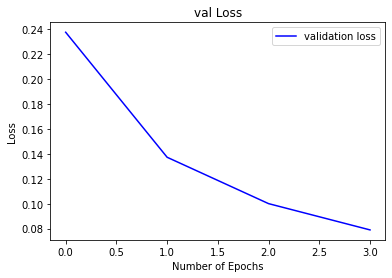

In [ ]:
#dzięki wykresowi, który monitoruje nasze val_loss możemy stwierdzić czy następuje overfit
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("val Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

313/313 [==============================] - 4s 11ms/step


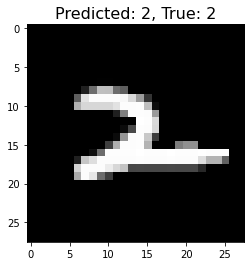

In [ ]:
#możecie sobie podejrzeć czy model zrobił dobrą predykcję
from matplotlib import pyplot

label_pred = model.predict(test_X)
label_pred_classes = np.argmax(label_pred, axis=1)

random_id_image = np.random.choice(len(test_X))
image_sample = test_X[random_id_image]
label_true = np.argmax(test_y, axis=1)
label_sample_true = label_true[random_id_image]
label_sample_pred_class = label_pred_classes[random_id_image]

pyplot.title("Predicted: {}, True: {}".format(label_sample_pred_class, label_sample_true), fontsize=16)
pyplot.imshow(image_sample.reshape(28, 28), cmap='gray')

In [ ]:
#test dokladnosci
test_loss, test_acc = model.evaluate(test_X, test_y)
print(f"test_loss: {test_loss}", f"test_acc: {test_acc}")

NameError: ignored